In [160]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt

N1 = 1.0
N2 = 1.0
N3 = 1.0
chi12 = 3.0
chi13 = 2.0
chi23 = 2.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [161]:
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2
    
#     psi1 = N1 * phi1 / (1. - 2. * chi1 * N1 * phi1)
#     psi2 = N2 * phi2 / (1. - 2. * chi2 * N2 * phi2)
#     psi3 = N3 * phi3 / (1. - 2. * chi3 * N3 * phi3)

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)

def f(p):
    return abs(sum(np.array(equations(p))**2)-0)

PLEASE NOTE: FSOLVE FINDS THE CLOSEST ROOT TO THE FIRST GUESS

GRID IS DEFINED TO SEARCH ALL 4 REGIONS CLOSE TO THE ROOTS

ONE WAY TO FIND ALL THE ROOTS, IF YOU HAD NO IDEA ABOUT THE FIRST GUESS, IS

TO MESH THE SYSTEM, LIKE THE WAY BALAJI DID, AND SEARCH ALL THE REGIONS

In [162]:
x_dim = np.arange(0.023, 0.99, 0.1)
y_dim = x_dim

###3D Grid
# z_dim = x_dim
# grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 3))

# m = 0
# for i in range(len(x_dim)):
#     for j in range(len(y_dim)):
#         for k in range(len(z_dim)):
#             grid[m,:] = x_dim[i], y_dim[j], z_dim[k]
#             m+=1

###2D Grid
grid = np.zeros((len(x_dim)*len(y_dim), 2))

m = 0
for i in range(len(x_dim)):
    for j in range(len(y_dim)):
        grid[m,:] = x_dim[i], y_dim[j]
        m+=1

Following will solve the equations with fsolve function

In [163]:
roots =[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(grid))):
    initial_guess = optimize.fmin(f, (grid[i]))
    pr = optimize.fsolve(equations, initial_guess)
    if (np.abs(equations(pr))<1e-5).all():
        roots.append(pr)
roots = np.array(roots)
r3 = 1.-(roots[:,0]+roots[:,1])
roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
              ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]

rounded_root = stats.mode(np.round(roots, 2))[0]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 74
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 66
Optimization terminated successfu

E:\python_setup_files\installation_Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)



         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 81
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 73
Optimization terminated successfully.
         Current function value:

In [164]:
print("(phi1, phi2, phi3):", (rounded_root[0,0], rounded_root[0,1], 1.-(rounded_root[0,0]+rounded_root[0,1])))

(phi1, phi2, phi3): (0.43, 0.25, 0.32000000000000006)


Let's plot "equations" function to see the result:

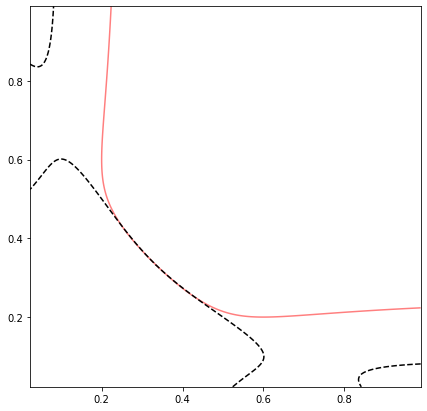

In [165]:
###
x, y = np.meshgrid(
    np.arange(0.023, .99, 0.003),
    np.arange(0.023, .99, 0.003))
plt.figure(figsize=(7,7))
Eq1_fig = plt.contour(x, y,
             equations([x, y])[0], 
             levels=[0], alpha=0.5, cmap='rainbow_r')
Eq2_fig = plt.contour(x, y,
             equations([x, y])[1],
            levels=[0], alpha=1, cmap='gray', linestyles='dashed')

plt.show()

In [166]:
line_Eq1 = []
line_Eq2 = []
for line in Eq1_fig.collections[0].get_paths():
    line_Eq1.append(line.vertices)
for line in Eq2_fig.collections[0].get_paths():
    line_Eq2.append(line.vertices)
# line_Eq1 = np.reshape(line_Eq1, (-1, 2))
# line_Eq2 = np.reshape(line_Eq2, (-1, 2))

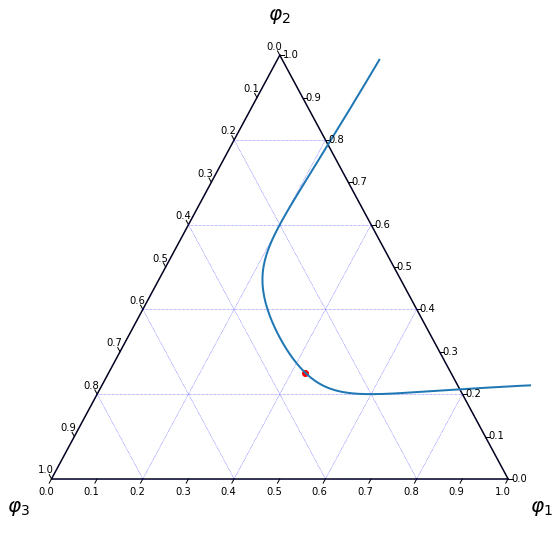

In [167]:
import ternary

points = np.empty((len(line_Eq1[0][:,0]),3))
points[:,0] = line_Eq1[0][:,0]
points[:,1] = line_Eq1[0][:,1]
points[:,2] = 1. - (line_Eq1[0][:,0] + line_Eq1[0][:,1])

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(9, 9)

## Shuffle points for additional plot

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.right_corner_label("$\\varphi_1$", fontsize=20)
tax.top_corner_label("$\\varphi_2$", fontsize=20)
tax.left_corner_label("$\\varphi_3$", fontsize=20)
tax.gridlines(multiple=0.2, color="blue")
tax.scatter([(rounded_root[0,0], rounded_root[0,1] ,1.-sum(rounded_root[0]))], marker='o', color='red', 
            label="Critical Point")
tax.plot(points, linewidth=2.0, label="Spinodal")

tax.show()
## please note that negative regions in the spinodal is not important and can be ignored. 
## roots are still satisfying the condition (phi1+phi2+phi3=1)